In [25]:
import idx2numpy
import numpy as np

import torch

import matplotlib.pyplot as plt

In [26]:
x_train = np.array(idx2numpy.convert_from_file('./data/emnist/emnist-letters-train-images-idx3-ubyte')).astype('float32')

patterns = np.array([x_train[i] for i in [43, 108, 555,]])
new = np.array([x_train[i] for i in [133, 10, 60,]])

patterns /= 255
new /= 255

patterns = np.fliplr(patterns)
new = np.fliplr(new)

patterns = np.rot90(patterns, k=3, axes=(1, 2))
new = np.rot90(new, k=3, axes=(1, 2))

patterns = patterns.reshape(patterns.shape[0], 784)
new = new.reshape(new.shape[0], 784)

patterns = np.where(patterns > 0.5, 1, -1)
new = np.where(new > 0.5, 1, -1)

In [27]:
def plot_pattern(pattern, title: str, ax, size):
    ax.imshow(pattern.reshape(size, size), cmap='gray')
    ax.set_title(title)
    ax.axis('off')

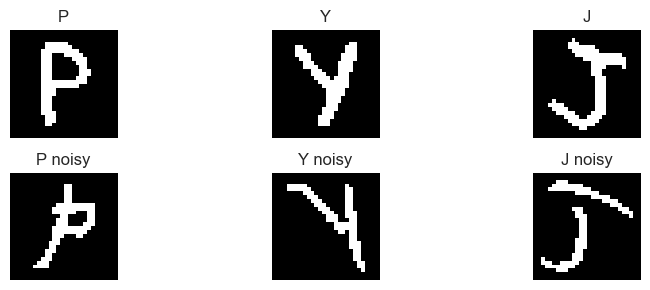

In [28]:
fig, axs = plt.subplots(2, 3, figsize=(9, 3))
plot_pattern(patterns[0], 'P', axs[0][0], 28)
plot_pattern(patterns[1], 'Y', axs[0][1], 28)
plot_pattern(patterns[2], 'J', axs[0][2], 28)
plot_pattern(new[2], 'P noisy', axs[1][0], 28)
plot_pattern(new[0], 'Y noisy', axs[1][1], 28)
plot_pattern(new[1], 'J noisy', axs[1][2], 28)
plt.tight_layout()
plt.show()

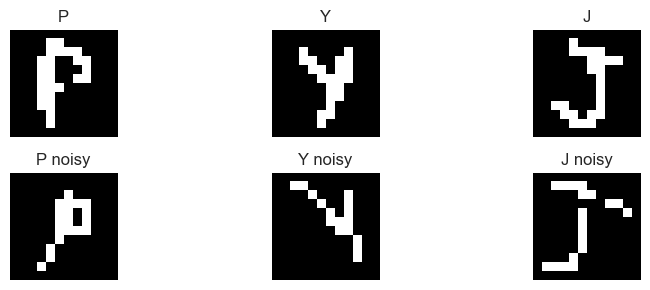

In [29]:
from PIL import Image


def resize_image(img_np, size=(10, 10)):
    img_pil = Image.fromarray(((img_np + 1) / 2 * 255).astype('uint8'))  # Преобразуем обратно в [0,255]
    img_resized = img_pil.resize(size, Image.BILINEAR)  # Можно NEAREST или BILINEAR
    img_np = np.array(img_resized).astype('float32') / 255
    img_np = np.where(img_np > 0.5, 1, -1)
    return img_np


size = 12

patterns_resized = np.array([resize_image(p.reshape(28, 28), size=(size, size)) for p in patterns])
new_resized = np.array([resize_image(n.reshape(28, 28), size=(size, size)) for n in new])

# Вернуть в плоский вектор
patterns_resized = patterns_resized.reshape(len(patterns), -1)
new_resized = new_resized.reshape(len(new), -1)

# В PyTorch
patterns_resized = torch.tensor(patterns_resized, dtype=torch.float32)
new_resized = torch.tensor(new_resized, dtype=torch.float32)

fig, axs = plt.subplots(2, 3, figsize=(9, 3))
plot_pattern(patterns_resized[0], 'P', axs[0][0], size)
plot_pattern(patterns_resized[1], 'Y', axs[0][1], size)
plot_pattern(patterns_resized[2], 'J', axs[0][2], size)
plot_pattern(new_resized[2], 'P noisy', axs[1][0], size)
plot_pattern(new_resized[0], 'Y noisy', axs[1][1], size)
plot_pattern(new_resized[1], 'J noisy', axs[1][2], size)
plt.tight_layout()
plt.show()

In [82]:
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size))

    def train(self, patterns):
        for p in patterns:
            p = p.reshape(-1, 1)
            self.weights += p @ p.T
        np.fill_diagonal(self.weights, 0)  # отключаем самосвязи
        self.weights /= len(patterns)

    def sign(self, x):
        return np.where(x >= 0, 1, -1)

    def recall(self, input_pattern, steps=5):
        s = input_pattern.copy()
        for _ in range(steps):
            for i in range(self.size):
                net = np.dot(self.weights[i], s)
                s[i] = self.sign(net)
        return s

In [43]:
net = HopfieldNetwork(size=size**2)
net.train(patterns_resized)

TypeError: only integer tensors of a single element can be converted to an index

In [32]:
input = new_resized[0]
output = net.recall(input)

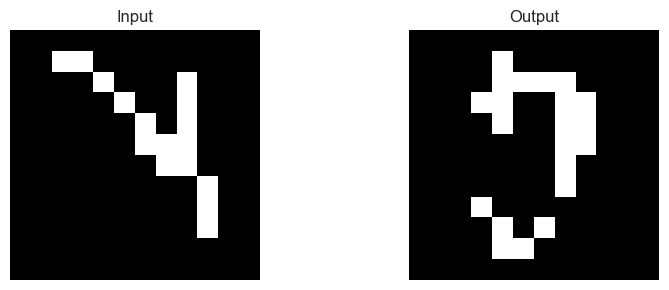

In [33]:
_, axs = plt.subplots(1, 2, figsize=(9, 3))
plot_pattern(input, 'Input', axs[0], size)
plot_pattern(output, 'Output', axs[1], size)
plt.tight_layout()
plt.show()

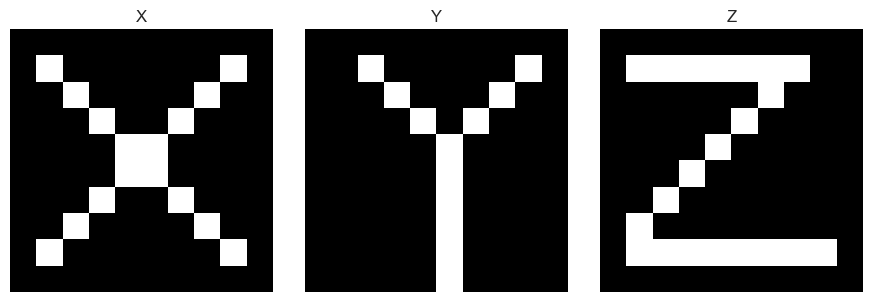

In [86]:
X = np.array([
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
    -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
    -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
    -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
    -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
    -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
    -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
    -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1
])
Y = np.array([
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1,  1, -1, -1, -1, -1, -1,  1, -1,
    -1, -1, -1,  1, -1, -1, -1,  1, -1, -1,
    -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
    -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
])
Z = np.array([
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
    -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
    -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
    -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
    -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
    -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
    -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
])

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
plot_pattern(X, 'X', axs[0], 10)
plot_pattern(Y, 'Y', axs[1], 10)
plot_pattern(Z, 'Z', axs[2], 10)
plt.tight_layout()
plt.show()

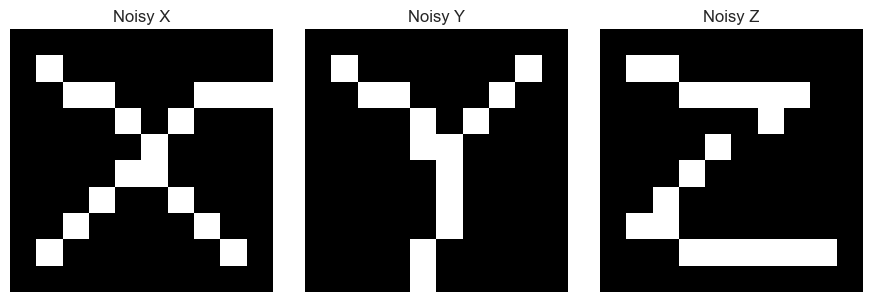

In [87]:
noisy_X = np.array([
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,
    -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
    -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
    -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
    -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
    -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
    -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1
])
noisy_Y = np.array([
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
    -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,
    -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,
    -1, -1, -1, -1,  1,  1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
    -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
    -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
    -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
])
noisy_Z = np.array([
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
    -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,
    -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
    -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
    -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
    -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
    -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
    -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,
    -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
])
fig, axs = plt.subplots(1, 3, figsize=(9, 3))
plot_pattern(noisy_X, 'Noisy X', axs[0], 10)
plot_pattern(noisy_Y, 'Noisy Y', axs[1], 10)
plot_pattern(noisy_Z, 'Noisy Z', axs[2], 10)
plt.tight_layout()
plt.show()

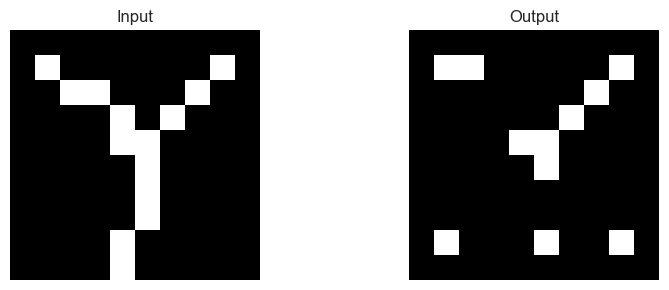

In [88]:
net = HopfieldNetwork(100)
net.train([X, Y, Z])

input = noisy_Y
output = net.recall(input, steps=3)

_, axs = plt.subplots(1, 2, figsize=(9, 3))
plot_pattern(input, 'Input', axs[0], 10)
plot_pattern(output, 'Output', axs[1], 10)
plt.tight_layout()
plt.show()

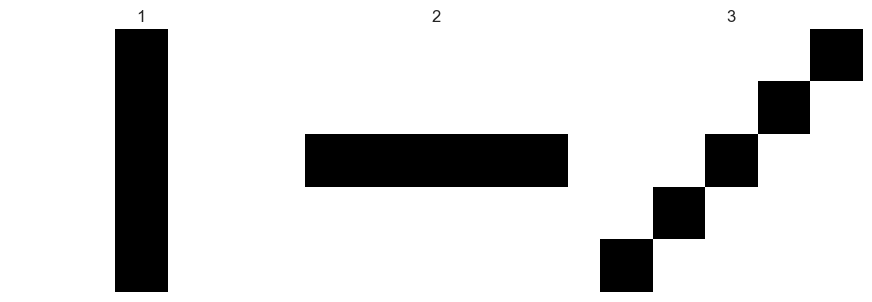

In [89]:
patterns = np.array([
    [ 1,  1, -1,  1,  1,
      1,  1, -1,  1,  1,
      1,  1, -1,  1,  1,
      1,  1, -1,  1,  1,
      1,  1, -1,  1,  1,],

    [ 1,  1,  1,  1,  1,
      1,  1,  1,  1,  1,
     -1, -1, -1, -1, -1,
      1,  1,  1,  1,  1,
      1,  1,  1,  1,  1,],

    [ 1,  1,  1,  1, -1,
      1,  1,  1, -1,  1,
      1,  1, -1,  1,  1,
      1, -1,  1,  1,  1,
     -1,  1,  1,  1,  1,],
])

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
plot_pattern(patterns[0], '1', axs[0], 5)
plot_pattern(patterns[1], '2', axs[1], 5)
plot_pattern(patterns[2], '3', axs[2], 5)
plt.tight_layout()
plt.show()

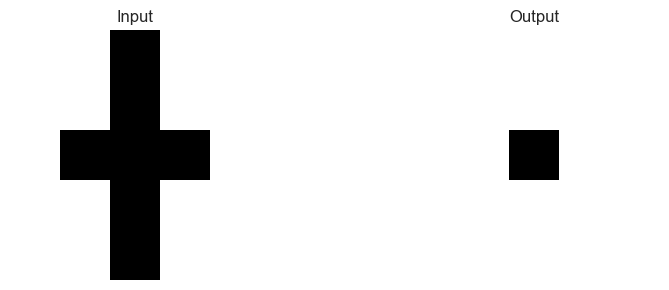

In [104]:
net = HopfieldNetwork(25)
net.train(patterns)

input = np.array([
      1,  1, -1,  1,  1,
      1,  1, -1,  1,  1,
      1, -1, -1, -1,  1,
      1,  1, -1,  1,  1,
      1,  1, -1,  1,  1,
])
output = net.recall(input, steps=5)

_, axs = plt.subplots(1, 2, figsize=(9, 3))
plot_pattern(input, 'Input', axs[0], 5)
plot_pattern(output, 'Output', axs[1], 5)
plt.tight_layout()
plt.show()